In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('dataset/SAT_and_GPA.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [3]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


# discovery

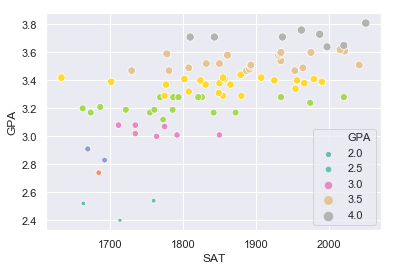

In [4]:
ax = sns.scatterplot(x='SAT', y='GPA', hue='GPA', size='GPA', palette='Set2', data=data)


# regression

In [5]:
# define dependent and independent features
y = data['GPA']
x = data['SAT']

x.shape, y.shape

((84,), (84,))

In [6]:
# convert to matrix for scikit-learn
x_matrix = x.values.reshape(-1,1)
y_matrix = y.values.reshape(-1,1)

x_matrix.shape, y_matrix.shape

((84, 1), (84, 1))

In [7]:
# do regression w/ default settings, copy_X, fit_intercept, n_jobs, normalize

reg = LinearRegression()

reg.fit(x_matrix, y_matrix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# get regression results
print('r-squared:', reg.score(x_matrix, y),
      '\ncoefficients: ', reg.coef_,
      '\nintercept:', reg.intercept_)

r-squared: 0.40600391479679765 
coefficients:  [[0.00165569]] 
intercept: [0.2750403]


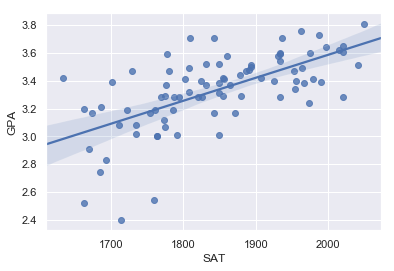

In [9]:
sns.regplot(x="SAT", y="GPA", data=data);
# sns.lmplot(x="SAT", y="GPA", col='Attendance', data=data, hue='Attendance');

## Validations

In [10]:
test_data = pd.DataFrame(data=[2400,1760], columns=['SAT'])
test_data

,SAT
0,2400
1,1760


In [11]:
test_data['predicted_GPA'] = reg.predict(test_data)
test_data

,SAT,predicted_GPA
0,2400,4.248692
1,1760,3.189051
